In [8]:
from data_analysis_codes import param
from data_analysis_codes.tools import PlottingTools as RPlot

def collect(p, zevars):
    pd = RPlot.getdata(p, zevars)
    #e = RPlot.geterror(p, 'h5', zevars)
    return {'p':p, 'pd':pd}#, 'e':e}

In [9]:
zevars = ['Q', 'a_av', 'K_av', 'drho_OD', 'RicciS_av']
#P0 = collect(param.pflrw_d3e2_L1206_t1_N128_zc0(), zevars)
Ps = [collect(param.pflrw_d3e2_L1821_t1_N128_LCDM(), zevars)]
#Ps += [collect(param.pflrw_d1e2_L1821_t1_N64(), zevars)]
Ps += [collect(param.pflrw_A1e3_L1821_t1_N128_LCDM(), zevars)]
Ps += [collect(param.pflrw_A1e4_L1821_t1_N128_LCDM(), zevars)]
#Ps += [collect(param.pflrw_d1e5_L1821_t1_N64(), zevars)]
#Ps += [collect(param.pflrw_d1e6_L1821_t1_N64(), zevars)]
#Ps += [collect(param.pflrw_d1e7_L1821_t1_N64(), zevars)]

In [10]:
import matplotlib.pyplot as plt
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)
from matplotlib import gridspec
import numpy as np

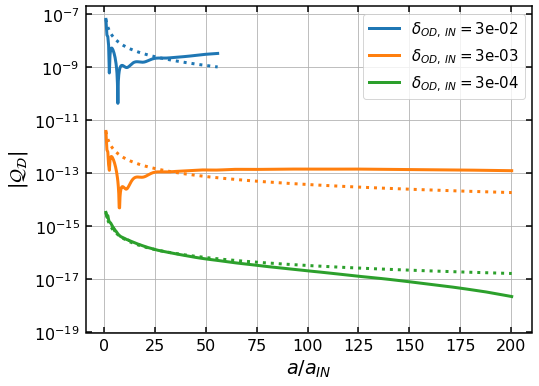

In [12]:
COLs = ['C0', 'C1', 'C2', 'C3', 'C5', 'C6', 'C7']
for p, c, i in zip(Ps, COLs, [0, 0, 1, 1, 8]):
    plt.semilogy(p['pd']['an'], abs(p['pd']['Q']), color=c, label=r'$\delta_{OD,\;IN}=$'+'{:.0e}'.format(p['pd']['drho_OD'][0]))
    plt.semilogy(p['pd']['an'], abs(p['pd']['Q'][i]*p['pd']['a_av'][i]/p['pd']['a_av']), color=c, linestyle=':')
    #Qer = RPlot.ferr(p['pd']['Q'], p['e']['Q'])
    #etop = Qer+p['e']['Q']
    #edow = Qer-p['e']['Q']
    #errortop = [np.max([abs(etop[i]), abs(edow[i])]) for i in range(len(etop))]
    #errordow = [np.min([abs(etop[i]), abs(edow[i])]) for i in range(len(etop))]
    #plt.fill_between(RPlot.ferr(p['pd']['an'], p['e']['Q']), errordow, errortop, facecolor=c, edgecolor=c, alpha=0.15)
plt.grid()
plt.xlabel(r'$a/a_{IN}$')
plt.ylabel(r'$|\mathcal{Q}_\mathcal{D}|$')
plt.legend(bbox_to_anchor=(1,1), fontsize=15)
plt.ylim(1e-19, 2e-7)
plt.savefig('backreaction')

Text(0, 0.5, '$|-\\frac{Q_\\mathcal{D}}{6\\langle H\\rangle_\\mathcal{D}^2}|$')

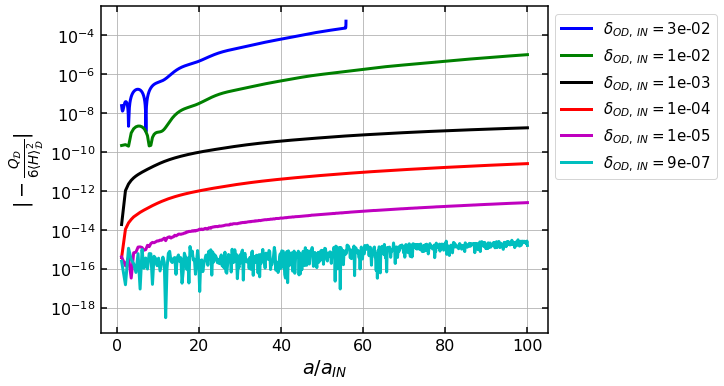

In [5]:
COLs = ['b', 'g', 'k', 'r', 'm', 'c', 'y']
for p, c, i in zip(Ps, COLs, [0, 0, 1, 1, 8, -1, -3]):
    plt.semilogy(p['pd']['an'], abs(-3*p['pd']['Q']/(2*p['pd']['K_av']**2)), color=c, label=r'$\delta_{OD,\;IN}=$'+'{:.0e}'.format(p['pd']['drho_OD'][0]))
plt.legend(bbox_to_anchor=(1,1), fontsize=15)
plt.grid()
plt.xlabel(r'$a/a_{IN}$')
plt.ylabel(r'$|-\frac{Q_\mathcal{D}}{6\langle H\rangle_\mathcal{D}^2}|$')

Text(0, 0.5, '$|-\\frac{\\langle{}^{(3)}R\\rangle_\\mathcal{D}}{6H^2}|$')

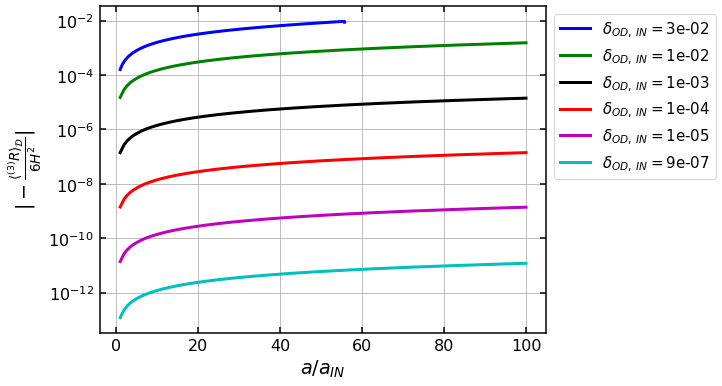

In [6]:
COLs = ['b', 'g', 'k', 'r', 'm', 'c', 'y']
for p, c, i in zip(Ps, COLs, [0, 0, 1, 1, 8, -1, -3]):
    plt.semilogy(p['pd']['an'], abs(-p['pd']['RicciS_av']/(6*p['pd']['H']**2)), color=c, label=r'$\delta_{OD,\;IN}=$'+'{:.0e}'.format(p['pd']['drho_OD'][0]))
    eR = p['e']['RicciS_av']
    Rer = RPlot.ferr(p['pd']['RicciS_av'], eR)
    Her = RPlot.ferr(p['pd']['H'], eR)
    etop = -(Rer+eR)/(6*Her**2)
    edow = -(Rer-eR)/(6*Her**2)
    errortop = [np.max([abs(etop[i]), abs(edow[i])]) for i in range(len(etop))]
    errordow = [np.min([abs(etop[i]), abs(edow[i])]) for i in range(len(etop))]
    plt.fill_between(RPlot.ferr(p['pd']['an'], eR), errordow, errortop, facecolor=c, edgecolor=c, alpha=0.15)
plt.legend(bbox_to_anchor=(1,1), fontsize=15)
plt.grid()
plt.xlabel(r'$a/a_{IN}$')
plt.ylabel(r'$|-\frac{\langle{}^{(3)}R\rangle_\mathcal{D}}{6H^2}|$')